# 1. Entendimento do negócio

## Contexto



Uma empresa está investindo mensalmente em plataformas de publicidade, como Youtube, Facebook e newspaper, para a prospecção de leads (pessoas interessadas em seus produtos). A fim de acompanhar o desempenho desses investimentos, a empresa registra todos os gastos com publicidade e todos os retornos de vendas gerados a partir desses investimentos.

Para entender melhor a relação entre as variáveis presentes nesses registros e identificar os fatores que mais impactam na geração de leads, a empresa solicitou a análise de um especialista em dados. Além disso, a empresa busca criar um modelo de predição de valores para estimar o retorno de vendas que pode ser gerado a partir de um determinado investimento em publicidade.


# 2. Entendimento dos dados

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
mkt = pd.read_csv(r"C:\Users\raafa\Downloads\MKT.csv")

In [74]:
mkt.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [75]:
# Informações gerais sobre o dataset
mkt.info()
print("\n")
mkt.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB




youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [76]:
# Estatística descritiva
round(mkt.describe(),2)

,youtube,facebook,newspaper,sales
count,171.00,171.00,171.00,171.00
mean,178.02,27.67,35.24,16.92
std,102.45,17.91,24.90,6.31
min,0.84,0.00,0.36,1.92
25%,91.08,11.70,13.74,12.54
50%,179.76,26.76,31.08,15.48
75%,262.98,43.68,50.88,20.82
max,355.68,59.52,121.08,32.40


## 2.1 Graphic Visualization

<Figure size 1200x600 with 0 Axes>

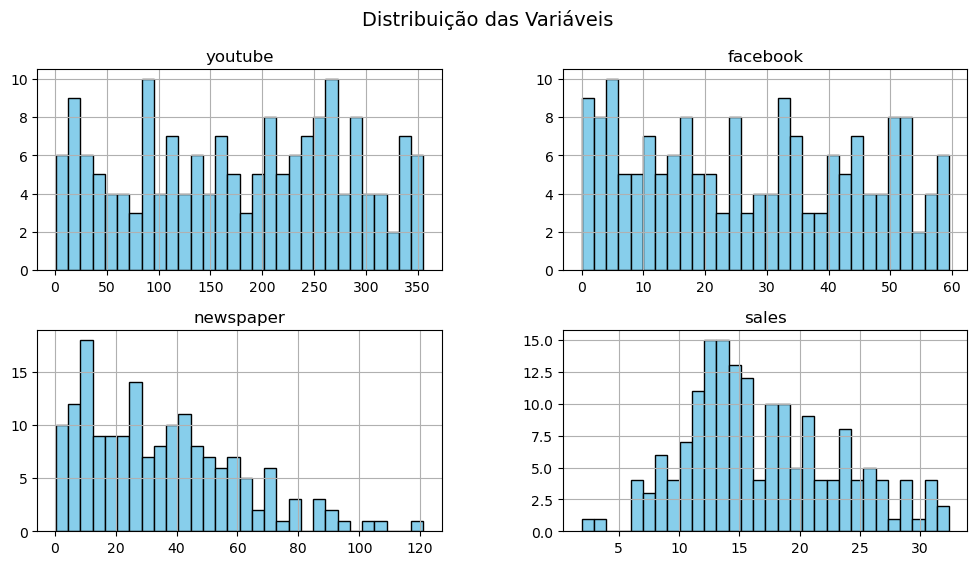

In [77]:
# Visualizar a distribuição das variáveis
plt.figure(figsize=(12,6))
mkt.hist(bins=30, figsize=(12,6), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição das Variáveis", fontsize=14)
plt.show()

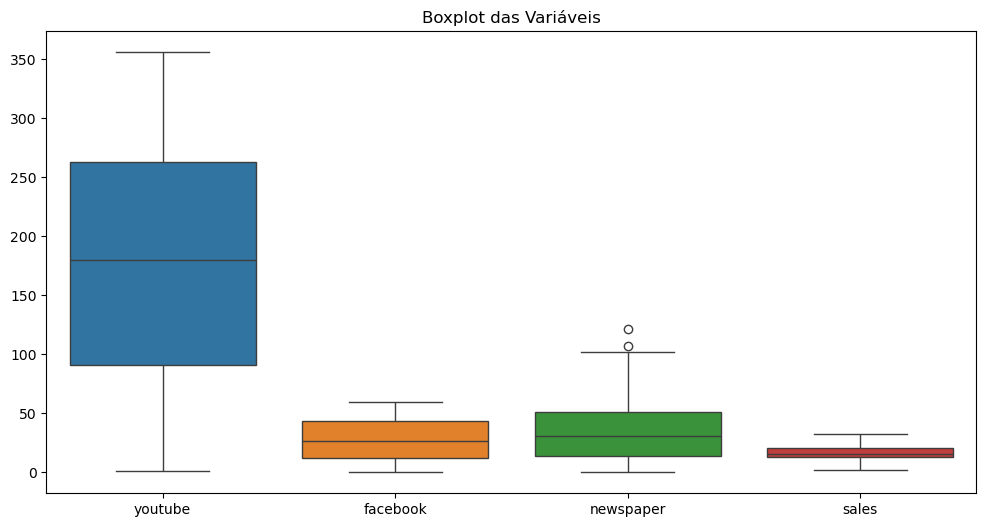

In [78]:
# Visualizar outliers com boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=mkt)
plt.title("Boxplot das Variáveis")
plt.show()

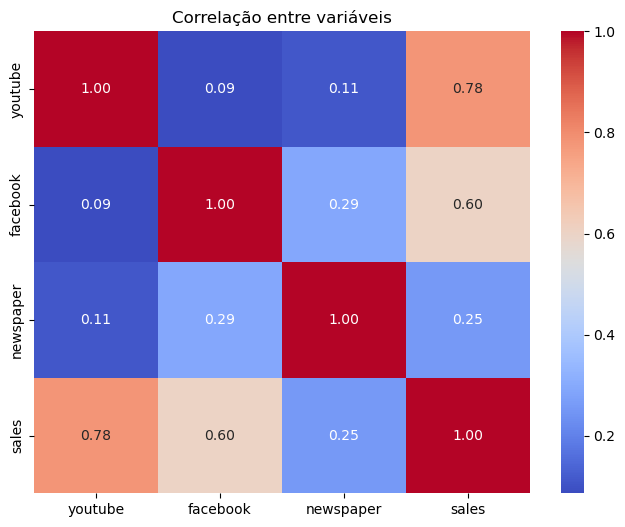

In [79]:
# Visualizar correlações entre as variáveis
plt.figure(figsize=(8,6))
sns.heatmap(mkt.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlação entre variáveis")
plt.show()

# 3. Análise Exploratória

In [80]:
# Soma de cada uma das colunas
soma_colunas = mkt.sum()
print("Soma de cada coluna:")
print(soma_colunas)

Soma de cada coluna:
youtube      30441.60
facebook      4731.84
newspaper     6026.04
sales         2893.80
dtype: float64


<Figure size 1200x600 with 0 Axes>

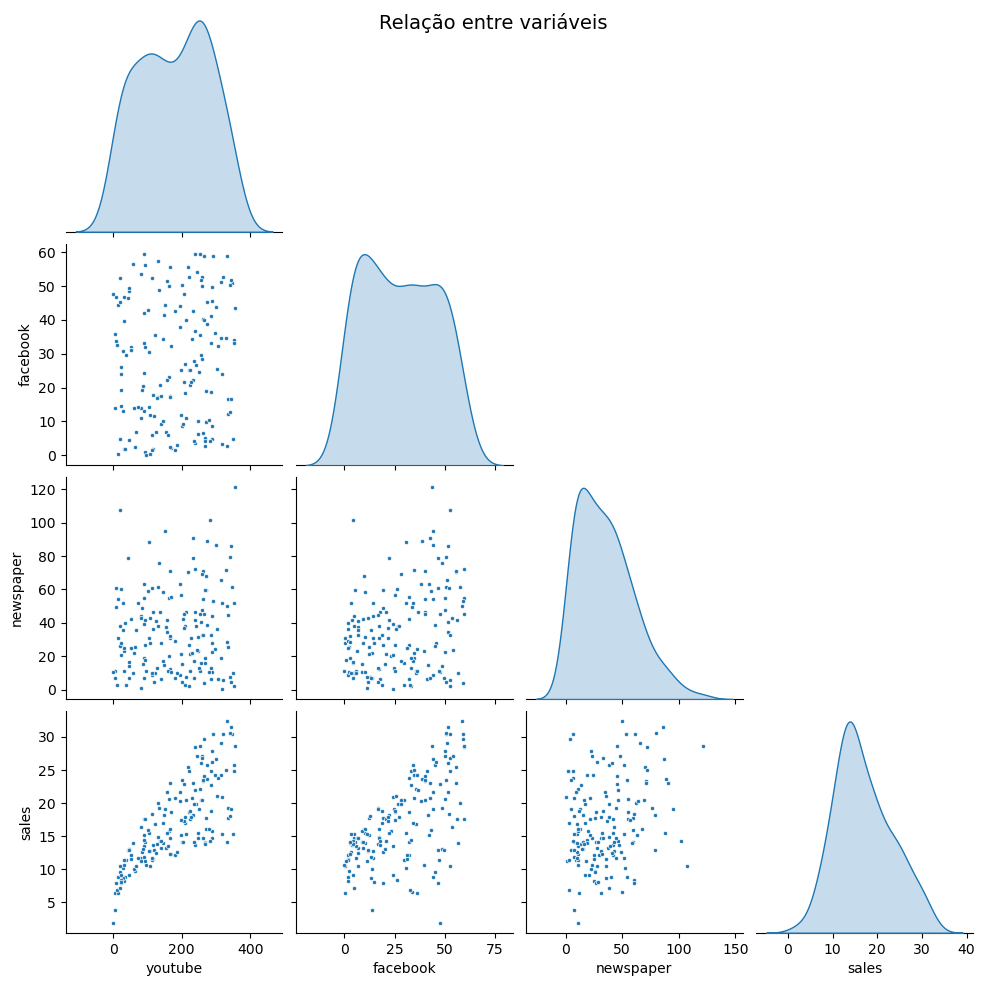

In [92]:
# Gráficos de dispersão para identificar padrões
plt.figure(figsize=(12, 6))
sns.pairplot(mkt, diag_kind='kde', markers='.', corner=True)
plt.suptitle("Relação entre variáveis", fontsize=14)
plt.show()

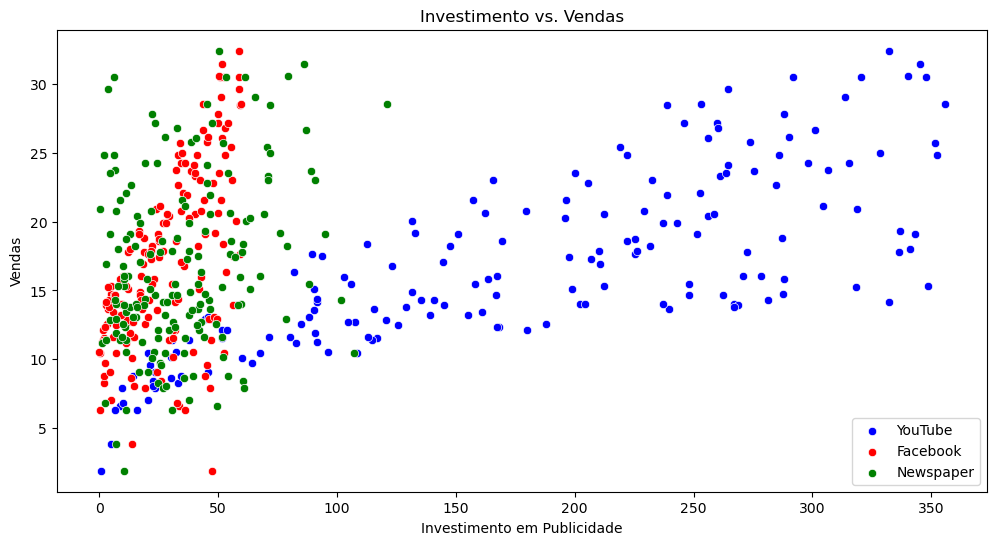

In [82]:
# Análise da relação entre investimento e vendas
plt.figure(figsize=(12,6))
sns.scatterplot(x=mkt["youtube"], y=mkt["sales"], label="YouTube", color='blue')
sns.scatterplot(x=mkt["facebook"], y=mkt["sales"], label="Facebook", color='red')
sns.scatterplot(x=mkt["newspaper"], y=mkt["sales"], label="Newspaper", color='green')
plt.xlabel("Investimento em Publicidade")
plt.ylabel("Vendas")
plt.title("Investimento vs. Vendas")
plt.legend()
plt.show()

# 4. Modelagem

In [83]:
# Definir variáveis independentes (X) e variável alvo (y)
X = mkt[["youtube", "facebook", "newspaper"]]
y = mkt["sales"]

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# Criar e treinar o modelo de Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [85]:
# Fazer previsões
y_pred = modelo.predict(X_test)

In [86]:
# Avaliação do modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 1.4034372074821058
MSE: 5.576790234026714
RMSE: 2.361522863329236
R²: 0.872863085701216


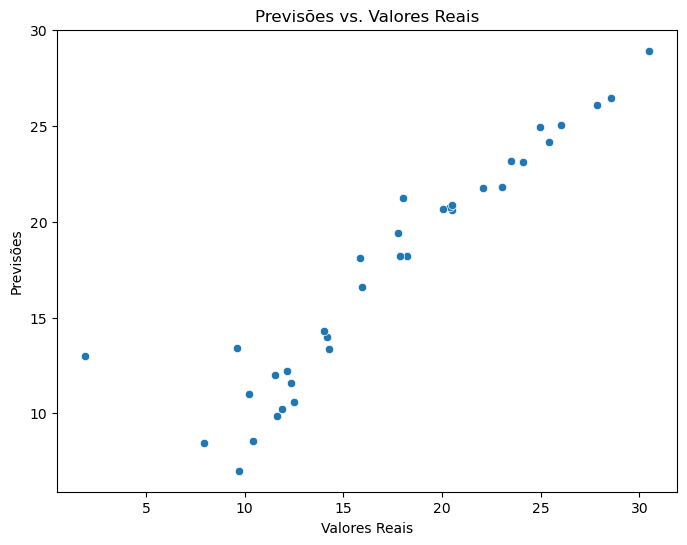

In [87]:
# Visualizar previsões vs. valores reais
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Previsões vs. Valores Reais")
plt.show()

# 5. Calculando predição

In [88]:
# Criar função para prever vendas com base nos investimentos
def prever_vendas(youtube, facebook, newspaper):
    investimento = np.array([[youtube, facebook, newspaper]])
    previsao = modelo.predict(investimento)
    return previsao[0]

In [89]:
# Exemplo de uso
investimento_exemplo = [200, 150, 50]  # Valores de investimento fictícios
total_previsto = prever_vendas(*investimento_exemplo)
print(f"Para um investimento de {investimento_exemplo}, a previsão de vendas é: {total_previsto:.2f}")

Para um investimento de [200, 150, 50], a previsão de vendas é: 41.71


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 6. Conclusão

### O YouTube parece ser o maior influenciador nas vendas
A análise dos dados revelou que os investimentos em publicidade no YouTube possuem a correlação mais forte com as vendas. Isso significa que, conforme a empresa aumenta o investimento nesta plataforma, há uma tendência clara de crescimento no número de vendas. A relação positiva indica que a publicidade no YouTube tem um impacto significativo, tornando-a a melhor opção para alocação de recursos publicitários.

### O Facebook tem impacto moderado nas vendas

Os dados mostram que o Facebook também contribui para o aumento das vendas, porém seu impacto não é tão expressivo quanto o do YouTube. Isso sugere que os anúncios nessa plataforma ainda são relevantes, mas podem precisar de estratégias de segmentação mais eficazes para maximizar os retornos. Testar diferentes abordagens, como públicos-alvo mais específicos ou formatos variados de anúncios, pode ser um caminho interessante.

### Investimentos em Newspaper têm baixa correlação com vendas
Os resultados indicam que os valores investidos em anúncios no Newspaper possuem uma relação fraca com o aumento das vendas. Isso pode significar que essa plataforma não é tão eficaz para atingir o público-alvo da empresa ou que o formato da publicidade não está sendo bem aproveitado. Com base nesses dados, pode ser interessante considerar a realocação desse orçamento para plataformas que demonstraram melhor desempenho.

### Correlação entre variáveis
A matriz de correlação confirmou que o YouTube tem a maior correlação positiva com as vendas, seguido pelo Facebook. O Newspaper, por outro lado, demonstrou uma correlação baixa, indicando que seus investimentos podem não estar diretamente influenciando os resultados. Essa análise ajuda a entender quais canais de marketing são mais eficientes e quais podem ser ajustados para melhorar o retorno sobre o investimento.

### Possíveis oportunidades de otimização
Diante dos insights obtidos, a empresa pode considerar realocar parte do orçamento investido em Newspaper para YouTube e Facebook, visto que esses canais demonstraram maior impacto nas vendas. Além disso, testar novas estratégias para os anúncios no Facebook pode ser uma forma de maximizar os retornos, enquanto o desempenho da publicidade no Newspaper pode ser reavaliado para verificar se ainda faz sentido mantê-la.

### O modelo de regressão apresenta boa capacidade preditiva

Os resultados da modelagem indicam que a regressão linear conseguiu prever as vendas com um bom nível de precisão. A métrica R² mostrou que o modelo é capaz de explicar grande parte da variação nas vendas com base nos investimentos feitos em publicidade. Além disso, os valores de erro, como o MAE (Erro Médio Absoluto) e o MSE (Erro Quadrático Médio), sugerem que o modelo tem um desempenho consistente, tornando-se uma ferramenta útil para prever retornos futuros com base em diferentes estratégias de investimento.